In [1]:
import os
import sys
import json
from functools import partial
import shutil
import importlib
from pathlib import Path

import h5py
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

sys.path.append('../../')
import forward_model
importlib.reload(forward_model)
from forward_model.main import get_forward_model
from forward_model.ics import get_delta
from forward_model.utils import compute_or_load_pow_spec

import hmc
importlib.reload(hmc)
from hmc.plot_utils import plot_reconstruction

In [2]:
N, L, Z_I, Z_F = 16, 90, 99, 0
N_TR = 1e6

BIAS_MODEL = "POWER_LAW"
ALPHA = 2.5
BIAS_PARAMS = {"ALPHA": ALPHA}

LPT_METHOD = "LPT1"
argdic = {
    "N": N,
    "L": L,
    "Z_I": Z_I,
    "Z_F": Z_F,
    "LPT_METHOD": LPT_METHOD,
    "PM_METHOD": "CIC",
    "INPUT_ARG": "U",
    "MUSCLE": True,
    "MUSCLE_ITERS": "ONE",
    "SC_CORRECTION": True,
    "BIAS_MODEL": BIAS_MODEL,
    "BIAS_PARAMS": BIAS_PARAMS,
    "N_TR": N_TR,
    "SAMPLE": 1,
}

get_tracers_poisson = get_forward_model(argdic)

argdic['SAMPLE'] = False
get_tracers_mean = get_forward_model(argdic)

In [3]:
SHAPE = N**3

seed_ints = 1, 3

key = jax.random.PRNGKey(seed_ints[0])
u_ref = jax.random.normal(key, shape=SHAPE)
n_tr_ref = get_tracers_poisson(u_ref)

key = jax.random.PRNGKey(seed_ints[1])
u = jax.random.normal(key, shape=SHAPE)
n_tr = get_tracers_mean(u)

pow_spec = compute_or_load_pow_spec(N, L, Z_I)

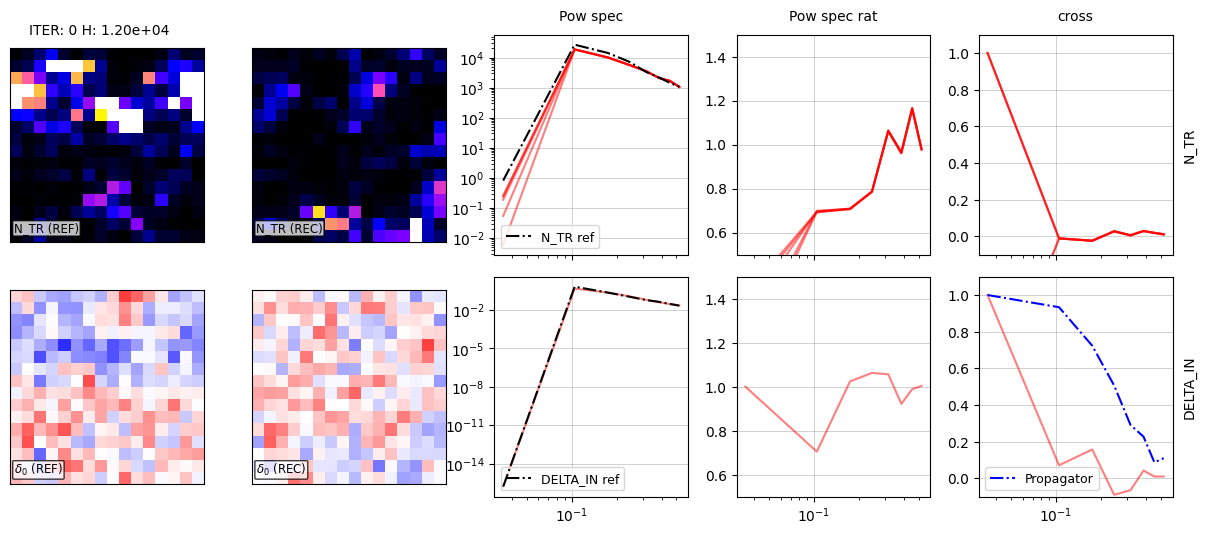

In [4]:
plot_reconstruction('hola.png', u_ref, u, n_tr_ref, n_tr, pow_spec, N, L, N_TR, ITER=0, N_SAMPLES=5, ENERGY=12000)

In [7]:
list(range(0, 500, 10))

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380,
 390,
 400,
 410,
 420,
 430,
 440,
 450,
 460,
 470,
 480,
 490]